In [11]:
import pandas as pd

### 1. 读取特征数据

In [12]:
df = pd.read_csv("./data/cleaned_df.csv", index_col=0)

In [13]:
X_new_add_amount = df.values.tolist()

In [14]:
len(X_new_add_amount[0])

76

In [15]:
df.columns

Index(['当前热度值', '新增热度值', '当前评论数', '新增评论数', '当前点赞数', '新增点赞数', '当前踩数', '新增踩数',
       '当前评分数', '当前小时评分人数', '当日爱奇艺播放指数', 'time_interval', '巴晨旭', '郭靖', '朱锐斌',
       '潘文杰', '薛少', '褚会林', '唐顺风', '干志文', '房映华', '崔俊杰', '张伟', '张浩', '李伟', '刘洋',
       '王伟', '张涛', '张磊', '冯芷墨', 'is_weekday', 'VIP-电影', '无', '精选-电影', '电影-电影',
       '电影-网大', 'VIP-焦点', '电影-焦点', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday', 'Friday', 'Saturday', 'Sunday', 'a', 'b', 'c', '0', '1',
       '2', '00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', 'heat_value_window_size_6'],
      dtype='object')

In [16]:
del df['新增热度值']
del df['新增评论数']
del df['新增点赞数']
del df['新增踩数']

In [17]:
X_total = df.values.tolist()

In [18]:
len(X_total[0])

72

### 2. 读取label数据

In [19]:
d = pd.read_csv("./data/filter_time_data.txt_new", sep="\t\t", header=None)

/home/wujiaocan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [20]:
d.columns = ['电影ID', '时间', '当前热度值', '新增热度值', '当前点击量', '新增点击量', '当前评论数', '新增评论数', '当前点赞数', '新增点赞数',
              '当前踩数', '新增踩数', '当前评分数', '推广位', '影片推广位等级', '当前小时弹幕数', '当前小时新增弹幕数', '当前小时评分人数',
              '当前小时新增评分人数', '当前小时五星评分人数', '当前小时四星评分人数', '当前小时三星评分人数', '当前小时二星评分人数',
              '当前小时一星评分人数', '当日爱奇艺播放指数', '影片上线时间', '导演', '编剧', '制片', '美术', '主演']

In [21]:
y_new_add_amount = d['新增点击量'].values.tolist()
y_total = d['当前点击量'].values.tolist()

### 3. 模型训练

#### 3.1 new add

MSE: 2966867.5181915406
RMSE: 1722.4597290478348


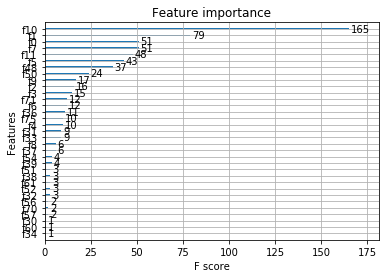

In [21]:
import xgboost as xgb
from xgboost import plot_importance
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
%matplotlib inline

#XGBoost训练过程
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_new_add_amount, y_new_add_amount,test_size=0.2, random_state=0)

# model = xgb.XGBRegressor(max_depth=8, n_estimators=500, gamma=0.169, colsample_bytree=0.5)
model_1 = xgb.XGBRegressor()
model_1.fit(X_train_1, y_train_1)

# 保存模型
model_1.save_model("./models/new_add_1.model")

# # 对测试集进行预测
ans_1 = model_1.predict(X_test_1)

# # 显示误差
print("MSE:",metrics.mean_squared_error(y_test_1, ans_1))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test_1, ans_1))) 

## 显示关键特征
plot_importance(model_1)
plt.show() 

In [9]:
import xgboost as xgb
from xgboost import plot_importance
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
%matplotlib inline

#XGBoost训练过程
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_new_add_amount, y_new_add_amount,test_size=0.2, random_state=0)

model_2 = xgb.XGBRegressor(max_depth=8, n_estimators=600, gamma=0.394, colsample_bytree=0.373, learning_rate=0.093)
# model_1 = xgb.XGBRegressor()
model_2.fit(X_train_2, y_train_2)

# 保存模型
model_2.save_model("./models/new_add_2.model")

# # 对测试集进行预测
ans_2 = model_2.predict(X_test_2)

# # 显示误差
print("MSE:",metrics.mean_squared_error(y_test_2, ans_2))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test_2, ans_2))) 

## 显示关键特征
# plot_importance(model_2)
# plt.show() 

MSE: 2420431.2098291023
RMSE: 1555.7735085252937


In [23]:
# 用所有的数据训练模型

import xgboost as xgb
from xgboost import plot_importance
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
%matplotlib inline

#XGBoost训练过程
# X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_new_add_amount, y_new_add_amount,test_size=0.2, random_state=0)

model_3 = xgb.XGBRegressor(max_depth=8, n_estimators=600, gamma=0.394, colsample_bytree=0.373, learning_rate=0.093)

model_3.fit(X_new_add_amount, y_new_add_amount)

# 保存模型
model_3.save_model("./models/new_add_3.model")

# # 对测试集进行预测
# ans_2 = model_2.predict(X_test_2)

# # # 显示误差
# print("MSE:",metrics.mean_squared_error(y_test_2, ans_2))
# print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test_2, ans_2))) 

## 显示关键特征
# plot_importance(model_2)
# plt.show() 

In [25]:
# from sklearn.model_selection import KFold, train_test_split, GridSearchCV
# from sklearn.metrics import confusion_matrix, mean_squared_error

# kf = KFold(n_splits=10, shuffle=True)

# for train_index, test_index in kf.split(X_new_add_amount):
    
#     xgb_model = xgb.XGBRegressor(max_depth=8, n_estimators=600, gamma=0.394, colsample_bytree=0.373, learning_rate=0.093).fit(X_new_add_amount[train_index], y_new_add_amount[train_index])
    
#     predictions = xgb_model.predict(X_new_add_amount[test_index])
    
#     actuals = y_new_add_amount[test_index]
    
#     print("RMSE:", np.sqrt(mean_squared_error(actuals, predictions)))

#### 3.2 total

In [22]:
import xgboost as xgb
from xgboost import plot_importance
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
%matplotlib inline

#XGBoost训练过程
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_total, y_total, test_size=0.2, random_state=0)

# model_2 = xgb.XGBRegressor(max_depth=8, n_estimators=600, gamma=0.394, colsample_bytree=0.373, learning_rate=0.093)
model_3 = xgb.XGBRegressor()
model_3.fit(X_train_3, y_train_3)

# 保存模型
model_3.save_model("./models/total_1.model")

# # 对测试集进行预测
ans_3 = model_3.predict(X_test_3)

# # 显示误差
print("MSE:",metrics.mean_squared_error(y_test_3, ans_3))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test_3, ans_3))) 

## 显示关键特征
# plot_importance(model_2)
# plt.show() 

MSE: 2773826364649.6865
RMSE: 1665480.8208591556


In [26]:
import xgboost as xgb
from xgboost import plot_importance
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
%matplotlib inline

#XGBoost训练过程
# X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_total, y_total, test_size=0.2, random_state=0)

# model_2 = xgb.XGBRegressor(max_depth=8, n_estimators=600, gamma=0.394, colsample_bytree=0.373, learning_rate=0.093)
model_4 = xgb.XGBRegressor()
model_4.fit(X_total, y_total)

# 保存模型
model_4.save_model("./models/total_2.model")

# # 对测试集进行预测
# ans_3 = model_3.predict(X_test_3)

# # # 显示误差
# print("MSE:",metrics.mean_squared_error(y_test_3, ans_3))
# print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test_3, ans_3))) 

## 显示关键特征
# plot_importance(model_2)
# plt.show() 